In [22]:
import random
import warnings
import numpy as np
import matplotlib.pyplot as plt
import dataLoader as dl

#from Inner_Speech_Dataset.Plotting.ERPs import 
from Inner_Speech_Dataset.Python_Processing.Data_extractions import  Extract_data_from_subject
from Inner_Speech_Dataset.Python_Processing.Data_processing import  Select_time_window, Transform_for_classificator, Split_trial_in_time


In [23]:
#Loading the data and labels from EEG and EXG
 
data, labels = dl.load_data(datatype="EEG", subject_nr=1 verbose=True) 
data2, labels2 = dl.load_data(datatype="EEG", subject_nr=2 verbose=True) 
data4 , labels4 = dl.load_data(datatype="EEG", subject_nr=4 verbose=True) 

dataX, labelsX = dl.load_data(datatype="EXG", verbose=False) 
#dl.load_data(datatype2=2) #4.5 is max

Data shape: [trials x channels x samples]
(500, 128, 1153)
Labels shape
(500, 4)
Final data shape
(90, 128, 1153)
Final labels shape
(90,)
Up is 0.0 and Down is 1.0
Up is 0.0 and Down is 1.0


In [24]:
#Splitting into training and test data
#print(labels)


order = np.arange(90)
np.random.shuffle(order)

temp_data = np.zeros(data.shape)
temp_labels = np.zeros(labels.shape)

for x in range(90):
    i = order[x]
    
    temp_data[x] = data[i]
    temp_labels[x] = labels[i]

data = temp_data
labels = temp_labels

data_train, data_test = np.split(data, indices_or_sections=[60],axis=0)
labels_train, labels_test = np.split(labels, indices_or_sections=[60],axis=0)
print(labels_train.shape)
print(data_test.shape)

print(labels)



(60,)
(30, 128, 1153)
[0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0.
 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1.]


In [25]:


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

tf.keras.backend.clear_session()



eeg_model = tf.keras.Sequential([
    layers.Flatten(input_shape = (128,1153)),
    layers.Dense(units=512, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(units=1024, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(units=512, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(units=2, activation="softmax")


])
eeg_model.build()
eeg_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 147584)            0         
                                                                 
 dense (Dense)               (None, 512)               75563520  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1024)              525312    
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0

In [29]:
eeg_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

eeg_model.fit(data_train, labels_train, epochs=60)

print("Results")
eeg_model.evaluate(data_test, labels_test)
result = eeg_model.predict(data_test)


Epoch 1/60
2/2 [==============================] - 1s 326ms/step - loss: 6.9885e-04 - accuracy: 1.0000
Epoch 2/60
2/2 [==============================] - 1s 324ms/step - loss: 8.5944e-04 - accuracy: 1.0000
Epoch 3/60
2/2 [==============================] - 1s 334ms/step - loss: 8.8591e-04 - accuracy: 1.0000
Epoch 4/60
2/2 [==============================] - 1s 325ms/step - loss: 6.0414e-04 - accuracy: 1.0000
Epoch 5/60
2/2 [==============================] - 1s 316ms/step - loss: 8.3118e-04 - accuracy: 1.0000
Epoch 6/60
2/2 [==============================] - 1s 327ms/step - loss: 2.0530e-04 - accuracy: 1.0000
Epoch 7/60
2/2 [==============================] - 1s 328ms/step - loss: 3.3552e-04 - accuracy: 1.0000
Epoch 8/60
2/2 [==============================] - 1s 321ms/step - loss: 1.8741e-04 - accuracy: 1.0000
Epoch 9/60
2/2 [==============================] - 1s 330ms/step - loss: 1.1567e-04 - accuracy: 1.0000
Epoch 10/60
2/2 [==============================] - 1s 325ms/step - loss: 1.8941e-0

In [27]:
result2 = []
print(result)
for res in result:
    x = np.maximum(res[0], res[1])
    result2.append(int(np.where(res == x)[0]))

result2 = np.array(result2)
print(result2)

[[8.33801087e-03 9.91662025e-01]
 [2.93347120e-01 7.06652880e-01]
 [1.83868210e-03 9.98161376e-01]
 [9.92234468e-01 7.76556833e-03]
 [1.73715815e-01 8.26284170e-01]
 [9.52977121e-01 4.70229127e-02]
 [9.98217762e-01 1.78221497e-03]
 [9.94214714e-01 5.78524126e-03]
 [1.29581930e-03 9.98704195e-01]
 [9.99843478e-01 1.56498267e-04]
 [4.14423607e-02 9.58557606e-01]
 [3.29040922e-03 9.96709585e-01]
 [3.96805882e-01 6.03194118e-01]
 [5.96136728e-04 9.99403834e-01]
 [9.98802423e-01 1.19757047e-03]
 [1.47261992e-01 8.52738023e-01]
 [9.99466479e-01 5.33589162e-04]
 [3.30619607e-03 9.96693850e-01]
 [7.58321464e-01 2.41678536e-01]
 [4.71939519e-02 9.52805996e-01]
 [7.16617048e-01 2.83382952e-01]
 [8.84113431e-01 1.15886584e-01]
 [4.05070418e-03 9.95949268e-01]
 [5.04067517e-04 9.99495864e-01]
 [7.86649510e-02 9.21335042e-01]
 [5.14882326e-01 4.85117614e-01]
 [9.99921799e-01 7.81925701e-05]
 [8.67382914e-04 9.99132693e-01]
 [2.02854440e-01 7.97145545e-01]
 [1.75370183e-02 9.82463002e-01]]
[1 1 1 0 

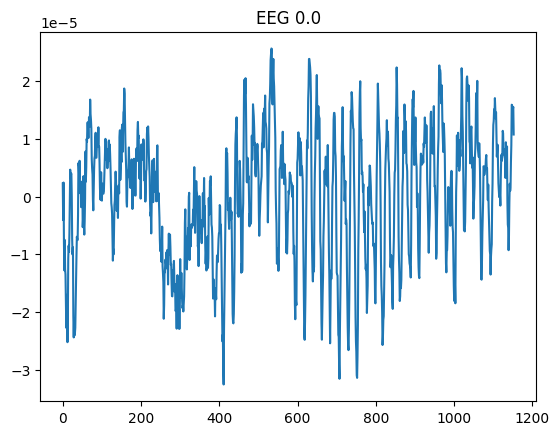

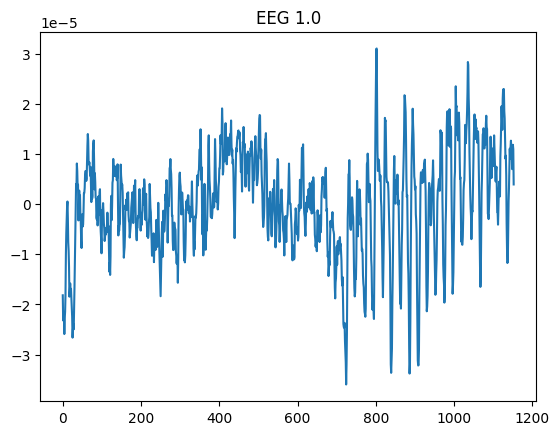

In [28]:


for trialNr, trial in enumerate(data[44:46],44):
    for channel in trial[5:6]:
        plt.figure()
        plt.plot(channel)
        plt.title("EEG {}".format(labels[trialNr]))

      